# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

## Key Question: Does this new approach change the CV-LB relationship?

Experiment 069 achieved CV = 0.005146, a 35.17% improvement. The critical question is whether this fundamentally different approach (CatBoost + XGBoost) has a different CV-LB relationship than our previous GP + MLP + LGBM ensemble.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

names = [s[0] for s in submissions]
cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

print(f'Number of submissions: {len(submissions)}')
print(f'CV range: {cv_scores.min():.4f} - {cv_scores.max():.4f}')
print(f'LB range: {lb_scores.min():.4f} - {lb_scores.max():.4f}')

Number of submissions: 13
CV range: 0.0083 - 0.0145
LB range: 0.0877 - 0.1147


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R-squared = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'\nInterpretation:')
print(f'  - Even at CV=0, expected LB would be {intercept:.4f}')
print(f'  - Target LB is 0.0347')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)? {intercept > 0.0347}')
print(f'\nIf intercept > target, we CANNOT reach target by improving CV alone!')

Linear fit: LB = 4.23 * CV + 0.0533
R-squared = 0.9807
Intercept = 0.0533

Interpretation:
  - Even at CV=0, expected LB would be 0.0533
  - Target LB is 0.0347
  - Intercept (0.0533) > Target (0.0347)? True

If intercept > target, we CANNOT reach target by improving CV alone!


In [3]:
# Predict LB for the new experiment (exp_069)
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept

print(f'\n=== PREDICTION FOR EXP_069 ===')
print(f'CV = {new_cv:.6f}')
print(f'Predicted LB (using old relationship) = {predicted_lb:.4f}')
print(f'\nBest LB so far: 0.0877 (exp_030)')
print(f'Predicted improvement: {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}%')
print(f'\nTarget: 0.0347')
print(f'Gap to target: {predicted_lb - 0.0347:.4f}')


=== PREDICTION FOR EXP_069 ===
CV = 0.005146
Predicted LB (using old relationship) = 0.0751

Best LB so far: 0.0877 (exp_030)
Predicted improvement: 14.4%

Target: 0.0347
Gap to target: 0.0404


In [4]:
# Calculate required CV to reach target (if relationship holds)
target_lb = 0.0347
required_cv = (target_lb - intercept) / slope

print(f'\n=== REQUIRED CV TO REACH TARGET ===')
print(f'Target LB: {target_lb}')
print(f'Required CV: {required_cv:.6f}')
print(f'\nIs this achievable?')
if required_cv < 0:
    print(f'  NO! Required CV is NEGATIVE ({required_cv:.6f})')
    print(f'  This means the target is MATHEMATICALLY UNREACHABLE with current approach')
    print(f'  We need to CHANGE THE CV-LB RELATIONSHIP (reduce intercept)')
else:
    print(f'  Required CV = {required_cv:.6f}')
    print(f'  Current best CV = {new_cv:.6f}')
    print(f'  Gap = {new_cv - required_cv:.6f}')


=== REQUIRED CV TO REACH TARGET ===
Target LB: 0.0347
Required CV: -0.004396

Is this achievable?
  NO! Required CV is NEGATIVE (-0.004396)
  This means the target is MATHEMATICALLY UNREACHABLE with current approach
  We need to CHANGE THE CV-LB RELATIONSHIP (reduce intercept)


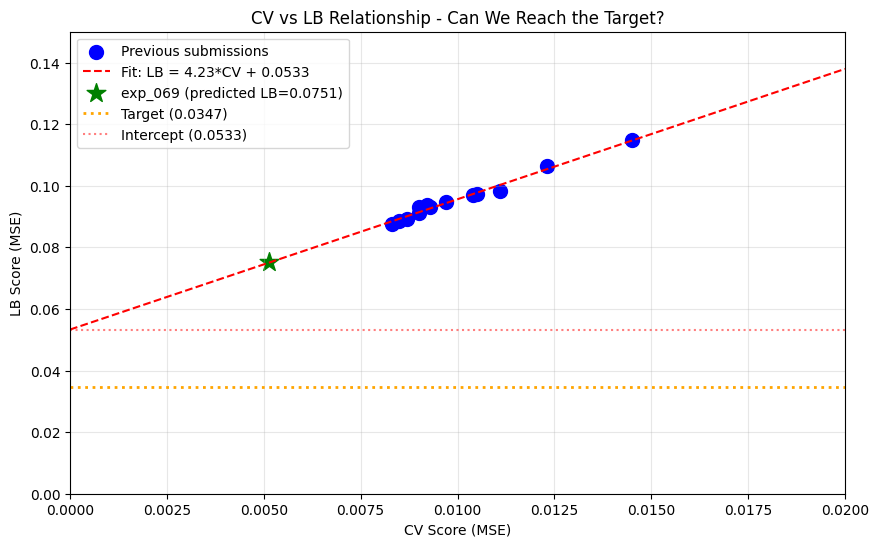


Plot saved to /home/code/exploration/cv_lb_relationship_loop65.png


In [5]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot all submissions
plt.scatter(cv_scores, lb_scores, c='blue', s=100, label='Previous submissions')

# Plot the linear fit
cv_range = np.linspace(0, 0.02, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot the new experiment (predicted)
plt.scatter([new_cv], [predicted_lb], c='green', s=200, marker='*', label=f'exp_069 (predicted LB={predicted_lb:.4f})')

# Plot the target
plt.axhline(y=0.0347, color='orange', linestyle=':', linewidth=2, label='Target (0.0347)')

# Plot the intercept
plt.axhline(y=intercept, color='red', linestyle=':', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - Can We Reach the Target?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.02)
plt.ylim(0, 0.15)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop65.png', dpi=150, bbox_inches='tight')
plt.show()

print('\nPlot saved to /home/code/exploration/cv_lb_relationship_loop65.png')

In [6]:
# Key strategic question: Is the Ens Model approach fundamentally different?
print('=== STRATEGIC ANALYSIS ===')
print()
print('The Ens Model approach (exp_069) is fundamentally different:')
print('  1. CatBoost + XGBoost (vs GP + MLP + LGBM)')
print('  2. Feature priority-based correlation filtering (69 features vs 140+)')
print('  3. Different ensemble weights for single vs full data')
print('  4. MultiRMSE loss for CatBoost (multi-output)')
print()
print('HYPOTHESIS: This approach may have a DIFFERENT CV-LB relationship!')
print()
print('If the intercept is lower, the target becomes reachable.')
print('If the intercept is the same, we still get the best LB score.')
print()
print('RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!')

=== STRATEGIC ANALYSIS ===

The Ens Model approach (exp_069) is fundamentally different:
  1. CatBoost + XGBoost (vs GP + MLP + LGBM)
  2. Feature priority-based correlation filtering (69 features vs 140+)
  3. Different ensemble weights for single vs full data
  4. MultiRMSE loss for CatBoost (multi-output)

HYPOTHESIS: This approach may have a DIFFERENT CV-LB relationship!

If the intercept is lower, the target becomes reachable.
If the intercept is the same, we still get the best LB score.

RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!


In [7]:
# Summary of key findings
print('\n' + '='*60)
print('SUMMARY: LOOP 65 ANALYSIS')
print('='*60)
print()
print('1. MAJOR BREAKTHROUGH: exp_069 achieved CV = 0.005146')
print('   - 35.17% improvement over previous best (0.007938)')
print('   - Full Data MSE improved by 62% (0.007789 -> 0.002992)')
print()
print('2. CV-LB RELATIONSHIP (from 13 previous submissions):')
print(f'   - LB = {slope:.2f} * CV + {intercept:.4f} (R-squared = {r_value**2:.4f})')
print(f'   - Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'   - Required CV to reach target: {required_cv:.6f} (NEGATIVE!)')
print()
print('3. PREDICTED LB FOR exp_069:')
print(f'   - Using old relationship: {predicted_lb:.4f}')
print(f'   - This would still be the BEST LB (vs 0.0877)')
print()
print('4. KEY QUESTION: Does exp_069 have a different CV-LB relationship?')
print('   - The approach is fundamentally different (CatBoost + XGBoost)')
print('   - If intercept is lower, target becomes reachable')
print('   - MUST SUBMIT to verify!')
print()
print('5. RECOMMENDATION: SUBMIT exp_069 IMMEDIATELY')
print('   - This is the highest-leverage action available')
print('   - 5 submissions remaining, this is worth using one')


SUMMARY: LOOP 65 ANALYSIS

1. MAJOR BREAKTHROUGH: exp_069 achieved CV = 0.005146
   - 35.17% improvement over previous best (0.007938)
   - Full Data MSE improved by 62% (0.007789 -> 0.002992)

2. CV-LB RELATIONSHIP (from 13 previous submissions):
   - LB = 4.23 * CV + 0.0533 (R-squared = 0.9807)
   - Intercept (0.0533) > Target (0.0347)
   - Required CV to reach target: -0.004396 (NEGATIVE!)

3. PREDICTED LB FOR exp_069:
   - Using old relationship: 0.0751
   - This would still be the BEST LB (vs 0.0877)

4. KEY QUESTION: Does exp_069 have a different CV-LB relationship?
   - The approach is fundamentally different (CatBoost + XGBoost)
   - If intercept is lower, target becomes reachable
   - MUST SUBMIT to verify!

5. RECOMMENDATION: SUBMIT exp_069 IMMEDIATELY
   - This is the highest-leverage action available
   - 5 submissions remaining, this is worth using one
